# Fundamental Stock Data
In this homework we will guide you through how to download free historical fundamentals for stocks. This data can be used to construct value and other fundamental strategies. There will be no "solution" for this homework as it is more of a guide.

### Packages
We will be using the <a href='https://pypi.org/project/simfin/' target="_blank" >simfin</a> and  <a href='https://pypi.org/project/yfinance/' target="_blank" >yfinance</a> packages. Install them using "pip install simfin" and "pip install yfinance" if you haven't already and import them as below.

In [4]:
import yfinance as yf 
import simfin as sf
import pandas as pd
import matplotlib.pyplot as plt

### Get Your SimFin API Key

First you must obtain an API key. Make an account at https://simfin.com. Confirm your account via email and then head to https://simfin.com/data/api to obtain your api key.

In [5]:
# set your api key here
api_key = '84cc1937-8c7b-439a-8e59-9a1994aa20f8'
sf.config.set_api_key(api_key=api_key)

### Set Your SimFin Data Directory

Simfin requires you to set a data directory where simfin data will be downloaded. Downloaded data is used for faster retrieval in the future. The default location is a folder named simfin_data in the home directory.

In [6]:
# set simfin_data
sf.set_data_dir('./simfin_data/')

### Download historical financial data from simfin.
The three financial statements containing fundamental data are the quarterly income, balance sheet and cash flows statements. Data from these statements can be loaded for all us tickers from simfin as below.

In [ ]:
income = sf.load_income(variant='quarterly', market='us')

balance_sheet = sf.load_balance(variant='quarterly', market='us')

cash_flow = sf.load_cashflow(variant='quarterly', market='us')

Dataset "us-income-quarterly" on disk (4 days old).
- Loading from disk ... 

C:\Users\adamd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\simfin\load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Below we observe the shape of the data.

All of the results are multi-index dataframes where the row is (ticker,date) and the column is a financial statement item. 

One of the important columns for backtesting is the Publish Date. This is the date the information was available to the public. 

For backtesting, we can assume the simfin data is available 1 business day after the Publish Date, since companies sometimes publish after market close or because we may not always be able to get the data immediately on publication for trading, depending on which data vendor you use. 

Because there are restatements to financial statements, even this will not be a fully "point-in-time" backtest where we only use information available at the time. It should be a reasonable approximation in many cases, however.

In [ ]:
cash_flow.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   
       2020-07-31      45846      USD         2020            Q3   2020-09-01   
       2020-10-31      45846      USD         2020            Q4   2020-12-18   
       2021-01-31      45846      USD         2021            Q1   2021-03-02   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2020-01-31     2021-03-02     310000000.0       313000000.0   
       2020-04-30     2021-03-02     309000000.0       312000000.0   
       2020-07-31     2021-06-01     309000000.0       312000000.0   
       2020-10-31     2021-09-01     308000000.0       311000000.0   
       2021-01-31     2022-03-03     306000000.0       309000000.0   

                    Net Income/Starting Line  Depreciation & Amortization  \
Ticker Report Date                                                          
A      2020-01-31                197000000.0                   79000000.0   
       2020-04-30                101000000.0                   76000000.0   
       2020-07-31                199000000.0                   77000000.0   
       2020-10-31                222000000.0                   76000000.0   
       2021-01-31                288000000.0                   76000000.0   

                    ...  Net Cash from Operating Activities  \
Ticker Report Date  ...                                       
A      2020-01-31   ...                           -59000000   
       2020-04-30   ...                           313000000   
       2020-07-31   ...                           290000000   
       2020-10-31   ...                           377000000   
       2021-01-31   ...                           238000000   

                    Change in Fixed Assets & Intangibles  \
Ticker Report Date                                         
A      2020-01-31                            -34000000.0   
       2020-04-30                            -33000000.0   
       2020-07-31                            -24000000.0   
       2020-10-31                            -27000000.0   
       2021-01-31                            -41000000.0   

                    Net Change in Long Term Investment  \
Ticker Report Date                                       
A      2020-01-31                                  NaN   
       2020-04-30                                  NaN   
       2020-07-31                                  NaN   
       2020-10-31                                  NaN   
       2021-01-31                                  NaN   

                    Net Cash from Acquisitions & Divestitures  \
Ticker Report Date                                              
A      2020-01-31                                         NaN   
       2020-04-30                                         NaN   
       2020-07-31                                         NaN   
       2020-10-31                                         NaN   
       2021-01-31                                         NaN   

                    Net Cash from Investing Activities  Dividends Paid  \
Ticker Report Date                                                       
A      2020-01-31                          -35000000.0     -56000000.0   
       2020-04-30                          -53000000.0     -55000000.0   
       2020-07-31                          -32000000.0     -56000000.0   
       2020-10-31                          -27000000.0     -55000000.0   
       2021-01-31                          -42000000.0     -59000000.0   

                    Cash from (Repayment of) Debt  \
Ticker Report Date                                  
A      2020-01-31                      56000000.0   
       2020-04-30

Let's observe which columns are available to us below from each financial statement.

In [ ]:
# observe available income columns
income.columns

Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)', 'Revenue',
       'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

In [ ]:
# observe available balance_sheet columns
balance_sheet.columns

Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')

In [ ]:
# observe available cash_flow columns
cash_flow.columns

Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Net Income/Starting Line', 'Depreciation & Amortization',
       'Non-Cash Items', 'Change in Working Capital',
       'Change in Accounts Receivable', 'Change in Inventories',
       'Change in Accounts Payable', 'Change in Other',
       'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Change in Long Term Investment',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Dividends Paid',
       'Cash from (Repayment of) Debt', 'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Change in Cash'],
      dtype='object')

Below we observe the number of tickers available for each statement and the start and end dates.

In [ ]:
def describe_data(data, data_name):
    size = len(set(data.index.get_level_values(0)))
    start_dt = data.index.get_level_values(1).min().strftime('%Y-%m-%d')
    end_dt = data.index.get_level_values(1).max().strftime('%Y-%m-%d')
    print (f'{data_name}: {size} tickers. Date range: {start_dt} to {end_dt}')

describe_data(income ,'Income Data')
describe_data(balance_sheet ,'Balance Sheet Data')
describe_data(cash_flow ,'Cash Flow Data')

Income Data: 3790 tickers. Date range: 2019-12-31 to 2024-10-31
Balance Sheet Data: 3790 tickers. Date range: 2019-12-31 to 2024-10-31
Cash Flow Data: 3790 tickers. Date range: 2019-12-31 to 2024-10-31


### Yahoo Finance Data
If you notice above, the simfin data ends a year ago. They only have 1 year lagged data. To get the most recent financial statement information, you can use yahoo finance.

First you must obtain a yfinance.Ticker object for your desired ticker.

In [ ]:
yf_ticker = yf.Ticker('NVDA')

Download information from the 3 financial statements as below.

In [ ]:
# Get the quarterly cash flow statements from yfinance

income_yf = yf_ticker.quarterly_financials

cash_flow_yf = yf_ticker.quarterly_cashflow

balance_sheet_yf = yf_ticker.quarterly_balance_sheet

In [ ]:
income_yf

,2025-07-31,2025-04-30,2025-01-31,2024-10-31,2024-07-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.153,0.143,0.123964,0.135,0.136
Normalized EBITDA,31937000000.0,22584000000.0,25821000000.0,22855000000.0,19708000000.0
Net Income From Continuing Operation Net Minority Interest,26422000000.0,18775000000.0,22091000000.0,19309000000.0,16599000000.0
Reconciled Depreciation,669000000.0,611000000.0,543000000.0,478000000.0,433000000.0
Reconciled Cost Of Revenue,12890000000.0,17394000000.0,10608000000.0,8926000000.0,7466000000.0
EBITDA,31937000000.0,22584000000.0,25821000000.0,22855000000.0,19708000000.0
EBIT,31268000000.0,21973000000.0,25278000000.0,22377000000.0,19275000000.0
Net Interest Income,530000000.0,452000000.0,450000000.0,411000000.0,383000000.0
Interest Expense,62000000.0,63000000.0,61000000.0,61000000.0,61000000.0


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


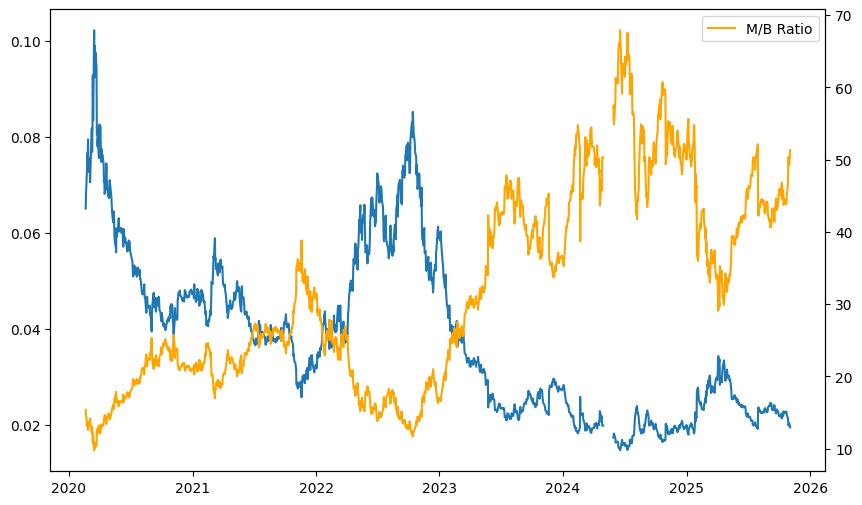

In [ ]:
simfinID = pd.Series(balance_sheet['SimFinId'].values, index=[f'{x[0]}' for x in balance_sheet.index])
simfinID = simfinID[~simfinID.index.duplicated(keep='first')]

# Simfin Data
NVDA = balance_sheet[balance_sheet['SimFinId'] == simfinID['NVDA']]
NVDA_selected = NVDA[['Total Liabilities', 'Total Equity', 'Shares (Basic)']]
NVDA_selected.columns = ['Liabilities', 'Equity', 'Shares']
NVDA_selected.index = NVDA['Publish Date']
NVDA_selected = NVDA_selected.sort_index(ascending=True)

# YF Data
NVDA_selected_yf = (balance_sheet_yf.T)[['Total Liabilities Net Minority Interest', 'Total Equity Gross Minority Interest', 'Ordinary Shares Number']]
NVDA_selected_yf.columns = ['Liabilities', 'Equity', 'Shares']
NVDA_selected_yf = NVDA_selected_yf.sort_index(ascending=True)


NVDA_combined = pd.concat([NVDA_selected, NVDA_selected_yf], axis=0)
NVDA_combined['Book Value'] = ( (NVDA_combined['Equity'] - 0 * NVDA_combined['Liabilities'])).round(2)



Close = yf.download("NVDA", start=min(NVDA_combined.index))['Close']['NVDA']

NVDA_combined = NVDA_combined.sort_index(ascending=True)
NVDA_combined = NVDA_combined.reindex(Close.index, method='ffill')

Market_Value = NVDA_combined['Shares'] * Close


fig, ax = plt.subplots(figsize=(10,6))
# plt.plot(NVDA_combined['Book Value'], label='Book Value')
# plt.plot(Market_Value, label='Market Value')
plt.plot(NVDA_combined['Book Value']/ Market_Value, label='B/M Ratio')
ax2 = ax.twinx()
plt.plot(Market_Value / NVDA_combined['Book Value'], color='orange', label='M/B Ratio')
plt.legend()
plt.show()

In [ ]:
NVDA_selected_yf.columns

Index(['Liabilities', 'Equity', 'Shares'], dtype='object')

In [ ]:
balance_sheet.columns

Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')